In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.shape

(1599, 12)

In [4]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
corr=data.corr()
corr.shape

(12, 12)

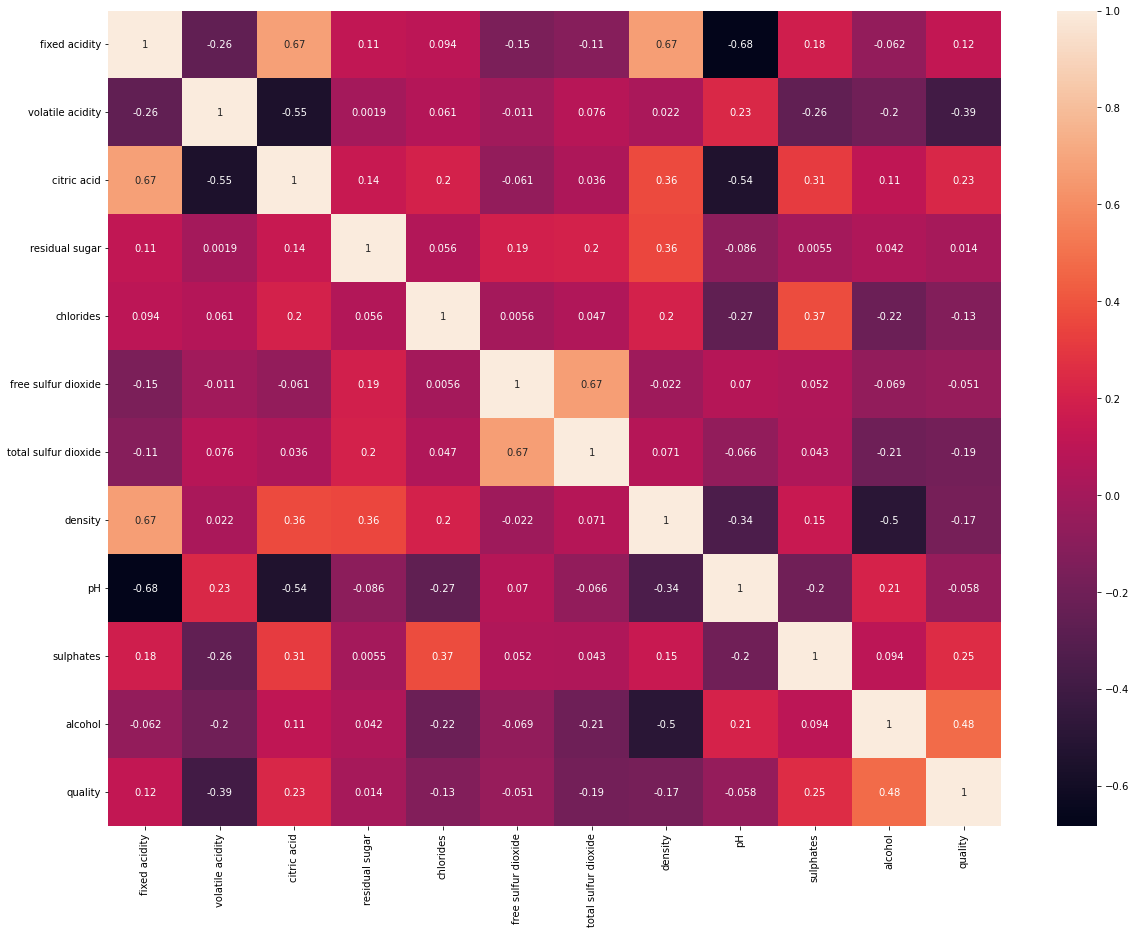

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

In [7]:
x=data.drop(columns=['quality'])
y=data['quality']

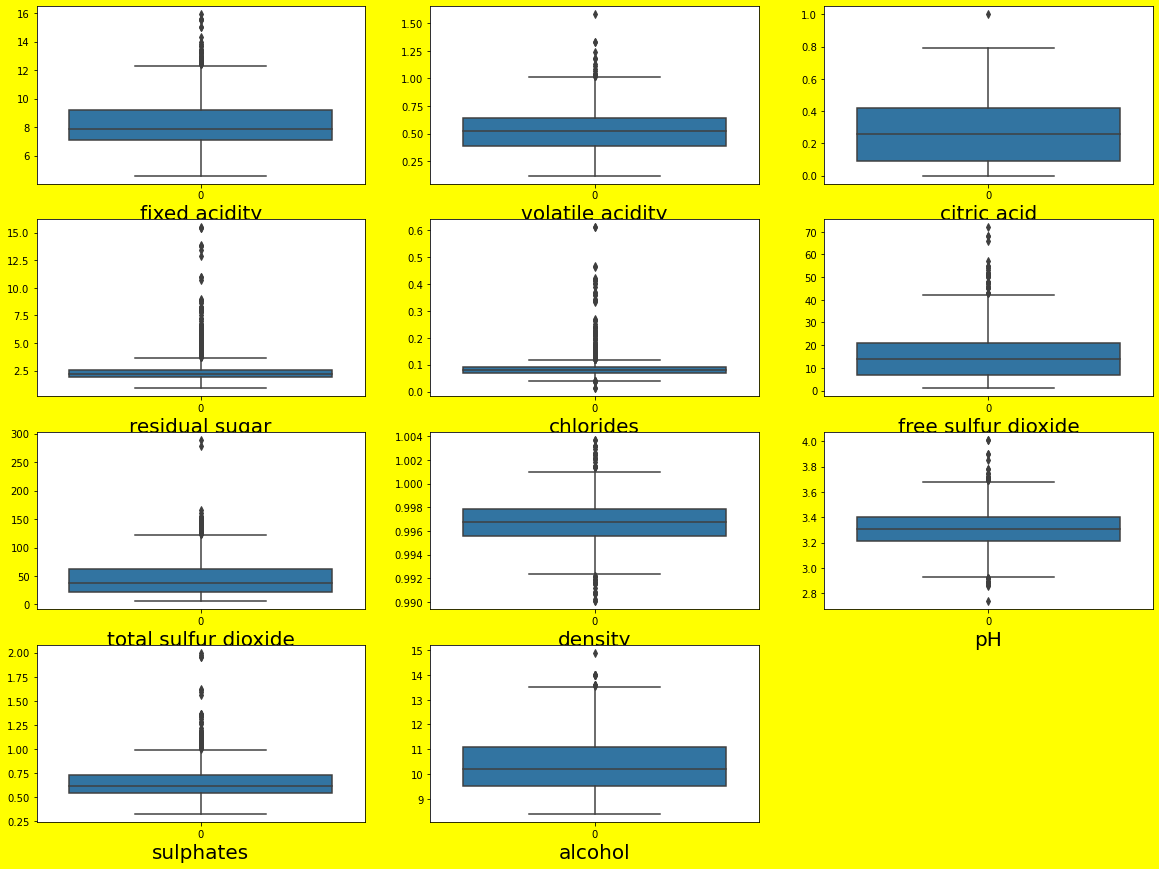

In [8]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data=x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1    
plt.show()    
    

In [9]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

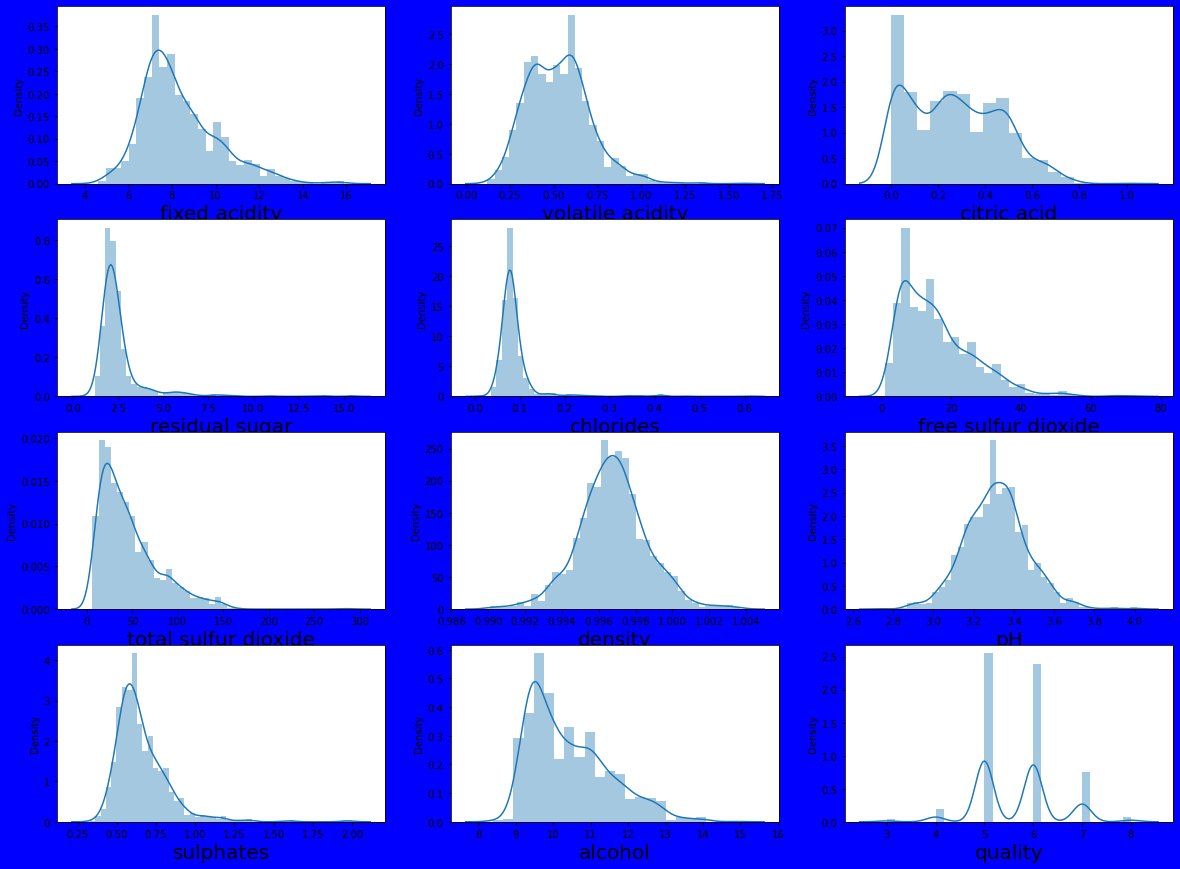

In [10]:
plt.figure(figsize=(20,15),facecolor='blue')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1    
plt.show()

In [11]:
from scipy.stats import zscore
z=np.abs(zscore(data))
print(np.where(z>3))
wine_new=data[(z<3).all(axis=1)]
wine_new


(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
Data_loss=((1599-1451)/1599)*100
Data_loss


9.255784865540964

In [13]:

x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [14]:
from sklearn.preprocessing import power_transform

In [15]:
x_new=power_transform(x)
df_new=pd.DataFrame(x_new,columns=x.columns)

In [16]:
df_new.skew()


fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

In [17]:
x=df_new

In [18]:
data['quality']=data['quality'].replace([3,4,5,6],0)

In [19]:
data['quality']=data['quality'].replace([7,8],1)

In [20]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

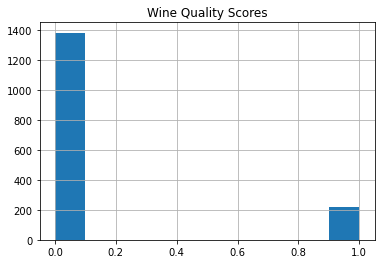

In [21]:
data["quality"].hist(grid=True)
plt.title("Wine Quality Scores")
plt.show()

In [22]:
x=data.drop(columns=['quality'])
y=data['quality']

In [23]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
sm=SMOTE()

In [26]:
x_ov, y_ov = sm.fit_resample(x,y)

In [27]:
y_ov.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x_ov,y_ov,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr_train=lr.predict(x_train)
    predlr_test=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

Best Accuracy is  0.8610709117221418 on Random State  7


In [34]:

x_train,x_test,y_train,y_test=train_test_split(x_ov,y_ov,test_size=0.25,random_state=MaxRS)

In [36]:

lr.score(x_train,y_train)

0.8109020742884708

In [37]:
lrpred=lr.predict(x_test)
lrpred

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,

In [38]:
print(accuracy_score(y_test,lrpred))

0.8610709117221418


In [39]:
print(confusion_matrix(y_test,lrpred))
print(classification_report(y_test,lrpred))

[[279  55]
 [ 41 316]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       334
           1       0.85      0.89      0.87       357

    accuracy                           0.86       691
   macro avg       0.86      0.86      0.86       691
weighted avg       0.86      0.86      0.86       691

